# Modulo 3: Basi di inferenza e analisi predittiva

Il nostro primo database è l'indagine sui bilanci delle famiglie italiane (Banca d'Italia). Ci concentriamo sulle famiglie con genitori in età lavorativa, in cui pertanto almeno un componente lavora. 

**L'obiettivo è quello di capire come determinate caratteristiche sociodemografiche sono associate con il reddito delle famiglie italiane.**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import data_table
import statsmodels.api as sm
data_table.enable_dataframe_formatter()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
famiglie = pd.read_csv('https://raw.githubusercontent.com/federicadaniele/PCTOcodingdatascience/main/Modulo3/shiw_famiglie.csv')
famiglie = famiglie[famiglie['singleparent']==0]
famiglie.head(100)

,nquest,ar,af,w,bollette,cn,cd,c,ncomp,acom5,...,padre_lavora,padre_eta,madre_eta,macroarea,madre_laurea,padre_laurea,padre_servizi,padre_industria,madre_servizi,madre_industria
1,20297,80000.0,5000.0000,85000.000,4000.0,28810.0,0,28810.0,2,5,...,0.0,56.0,37.0,nord,0.0,0.0,NaN,NaN,1.0,0.0
2,22099,485000.0,8139.2813,493139.280,1000.0,16200.0,0,16200.0,2,3,...,1.0,58.0,54.0,sud,0.0,0.0,1.0,0.0,NaN,NaN
3,22624,3500.0,0.0000,1500.000,NaN,22600.0,0,22600.0,4,4,...,1.0,59.0,55.0,sud,0.0,0.0,0.0,1.0,NaN,NaN
4,23797,5000.0,8500.0000,-37806.387,NaN,35800.0,0,35800.0,2,5,...,1.0,61.0,58.0,sud,0.0,0.0,1.0,0.0,NaN,NaN
5,24194,124000.0,100000.0000,224000.000,3500.0,25650.0,1600,27250.0,4,3,...,0.0,64.0,56.0,nord,0.0,0.0,NaN,NaN,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,507541,260000.0,12000.0000,272000.000,NaN,47100.0,12000,59100.0,4,1,...,1.0,55.0,49.0,centro,0.0,0.0,1.0,0.0,0.0,1.0
125,507544,532000.0,2050.0000,375050.000,NaN,39250.0,20500,59750.0,3,1,...,0.0,63.0,61.0,centro,1.0,0.0,NaN,NaN,1.0,0.0
126,507552,2000.0,23000.0000,25000.000,NaN,26900.0,16780,43680.0,4,1,...,1.0,47.0,43.0,centro,0.0,0.0,0.0,1.0,1.0,0.0
127,507905,102000.0,12000.0000,108000.000,NaN,28700.0,0,28700.0,7,1,...,0.0,65.0,61.0,centro,0.0,0.0,NaN,NaN,NaN,NaN


L'identificativo di una famiglia è la variabile **nquest**. Quante famiglie ci sono nel dataset?

In [ ]:
# completa!

Quali variabili?

In [ ]:
# completa!

I nostri dati contengono due tipi di informazioni inerenti a ciascuna famiglia:
- informazioni di natura sociodemografica (numero/età/sesso dei figli, regione di residenza, età dei genitori) 
- informazioni di natura economica (se i genitori lavorano, il reddito complessivo della famiglia, i consumi, la ricchezza, etc.)

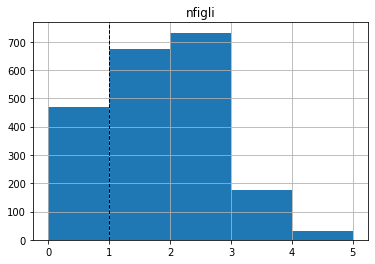

In [ ]:
# distribuzione del numero di figli 
famiglie.hist('nfigli',bins=5)
plt.axvline(famiglie['nfigli'].quantile(q=0.50), color='k', linestyle='dashed', linewidth=1) 

Qual'è il numero di figli medio per famiglia?

In [ ]:
# completa!

E la mediana?

In [ ]:
# completa!

In [ ]:
# provenienza geografica
famiglie['sud'] = 0
famiglie.loc[famiglie['macroarea'] =='sud', 'sud'] = 1
pd.crosstab(index=famiglie['sud'], columns='count')

pd.crosstab(index=famiglie['sud'], columns='count')

col_0,count
sud,
0,1305
1,778


Iniziamo con la nostra **prima regressione**. La variabile economica che vogliamo **prevedere** è il **reddito delle famiglie**. Per prima cosa, ispezioniamo la **distribuzione di questa variabile**.

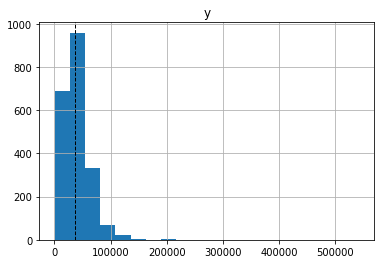

In [ ]:
famiglie.hist('y',bins=20)
plt.axvline(famiglie['y'].quantile(q=0.50), color='k', linestyle='dashed', linewidth=1) 

Notiamo come la distribuzione del reddito è molto asimmetrica. Un "trick" che si utilizza spesso per renderla simmetrica è quello di "trasformare" la variabile con il logaritmo. Ricordiamoci sempre che per fare delle operazioni matematiche in python serve che i dati abbiano uno **specifico formato**... vi ricordate quale?



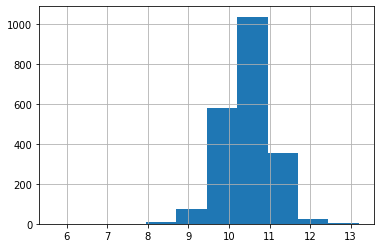

In [ ]:
logy = np.log(famiglie['y'])
tmp = pd.DataFrame(logy)
tmp.columns = ['logy']
pd.to_numeric(tmp['logy']).hist()

Iniziamo da una semplice regressione con **una sola variabile:**

In [ ]:
famiglie_redux = famiglie[['madre_lavora']]
X = famiglie_redux.to_numpy()
X = np.append(X,np.ones((len(famiglie_redux),1)),axis=1)
print('Quante sono le variabili X nella nostra regressione?')
len(X[0])

Quante sono le variabili X nella nostra regressione?


2

Ricorda che quando dobbiamo eseguire delle operazioni matematiche sui nostri dati, come per esempio la **stima di un modello**, dobbiamo prima trasformarli nel **formato** delle **numpy arrays**, che facciamo per mezzo della libreria `numpy` e del comando `df.to_numpy().`
 
Il pacchetto che ci consente di eseguire la stima di un modello di regressione lineare è `statsmodels`. Alla funzione **OLS** dobbiamo **passargli** l'insieme delle variabili "X" e la variabile "y" del nostro modello.

Pronti a stimare il nostro primo modello? Vai!

In [ ]:
# modello 1:
ols = sm.OLS(logy, X)
ols_result = ols.fit()
ols_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.141
Model:                            OLS   Adj. R-squared:                  0.141
Method:                 Least Squares   F-statistic:                     341.3
Date:                Fri, 11 Mar 2022   Prob (F-statistic):           1.08e-70
Time:                        15:37:02   Log-Likelihood:                -1666.0
No. Observations:                2083   AIC:                             3336.
Df Residuals:                    2081   BIC:                             3347.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4397      0.024     18.475      0.000       0.393       0.486
const         10.2062      0.018    570.935      0.000      10.171      10.241
==============================================================================
Omnibus:                      278.915   Durbin-Watson:                   1.838
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1562.844
Skew:                          -0.494   Prob(JB):                         0.00
Kurtosis:                       7.127   Cond. No.                         2.80
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Come commentiamo il risultato di questa stima? **


1.   La **correlazione** stimata tra le due variabili è positiva o negativa?
2.   La correlazione è stimata con sufficiente **precisione**?
3.   Qual è l'**R-squared** del modello?

Ora passiamo a vedere cosa succede quando aggiungiamo una seconda variabile al modello: alla fine, il modello di regressione lineare ha il vantaggio di consentirci di **analizzare come più di una variabile condizionano simultaneamente una variabile**, in questo caso i redditi.


In [ ]:
# modello 2:
famiglie_redux = famiglie[['madre_lavora', 'madre_laurea']]
X = famiglie_redux.to_numpy()
X = np.append(X,np.ones((len(famiglie_redux),1)),axis=1)
ols = sm.OLS(logy, X)
ols_result = ols.fit()
ols_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.182
Model:                            OLS   Adj. R-squared:                  0.181
Method:                 Least Squares   F-statistic:                     231.1
Date:                Fri, 11 Mar 2022   Prob (F-statistic):           2.27e-91
Time:                        12:36:19   Log-Likelihood:                -1615.2
No. Observations:                2083   AIC:                             3236.
Df Residuals:                    2080   BIC:                             3253.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.3728      0.024     15.442      0.000       0.325       0.420
x2             0.3285      0.032     10.199      0.000       0.265       0.392
const         10.1895      0.018    581.408      0.000      10.155      10.224
==============================================================================
Omnibus:                      296.224   Durbin-Watson:                   1.829
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1716.786
Skew:                          -0.527   Prob(JB):                         0.00
Kurtosis:                       7.321   Cond. No.                         3.48
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Come commentiamo il risultato di questa stima? **


1.   La **correlazione** stimata tra le due variabili è positiva o negativa?
2.   La correlazione è stimata con sufficiente **precisione**?
3.   Qual è l'**R-squared** del modello?

Il **modello n.2** è migliore del **modello n.1**?



**Proviamo adesso ad arricchire il nostro modello aggiungengo altre variabili tra le X.** Quali variabili vi sentireste di aggiungere?

In [ ]:
# modello 3:
# completa!

**Come commentiamo il risultato di questa stima? **


1.   La **correlazione** stimata tra le due variabili è positiva o negativa?
2.   La correlazione è stimata con sufficiente **precisione**?
3.   Qual è l'**R-squared** del modello?

Il **modello n.3** è migliore del **modello n.2**?

Proviamo adesso a stimare il seguente modello:

In [ ]:
# modello 4:
famiglie_redux = famiglie[['madre_lavora', 'madre_laurea','nfigli']]
X = famiglie_redux.to_numpy()
X = np.append(X,np.ones((len(famiglie_redux),1)),axis=1)
ols = sm.OLS(logy, X)
ols_result = ols.fit()
ols_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.184
Model:                            OLS   Adj. R-squared:                  0.183
Method:                 Least Squares   F-statistic:                     156.4
Date:                Fri, 11 Mar 2022   Prob (F-statistic):           2.19e-91
Time:                        16:35:28   Log-Likelihood:                -1612.3
No. Observations:                2083   AIC:                             3233.
Df Residuals:                    2079   BIC:                             3255.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.3805      0.024     15.641      0.000       0.333       0.428
x2             0.3244      0.032     10.071      0.000       0.261       0.388
x3             0.0286      0.012      2.405      0.016       0.005       0.052
const         10.1474      0.025    409.745      0.000      10.099      10.196
==============================================================================
Omnibus:                      299.082   Durbin-Watson:                   1.828
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1713.752
Skew:                          -0.538   Prob(JB):                         0.00
Kurtosis:                       7.311   Cond. No.                         5.75
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Come possiamo commentare questi risultati? **Che correlazione c'è tra il reddito di una famiglia e il numero di figli di quest'ultima?**

Secondo voi, **la correlazione tra il reddito della famiglia (Y) e il numero di figli (X) esprime un rapporto causale**, del tipo che X causa Y, o anche un numero di figli elevato causa un reddito famigliare elevato?